# Exercícios pré-processamento e estatística

In [127]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

**Usar o dado: world-data-2023.csv**

1. **Leitura e Carregamento de Dados:**
   - Usar bibliotecas como Pandas para carregar dados de diferentes fontes (CSV, Excel, SQL, etc.).


In [128]:
data = pd.read_csv('./../../Datasets/world-data-2023.csv')
pd.set_option('display.max_columns', data.shape[1])
nomes_paises = data['Country']
linguas = data['Official language']
display(data.sample(10))

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",163.52,2.80%,VND,2.05,48.10%,$0.80,"$261,921,244,843",110.60%,28.50%,16.5,Ho Chi Minh City,75.3,43.0,$0.73,Vietnamese,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
44,Czech Republic,139,CZ,45.20%,"78,867","23,000",10.70,420.0,Prague,"102,218",116.48,2.80%,CZK,1.69,34.60%,$1.17,"$246,489,245,495",100.70%,64.10%,2.7,Prague,79.0,3.0,$3.00,Czech,14.80%,4.12,"10,669,709",60.60%,14.90%,46.10%,1.93%,"7,887,156",49.817492,15.472962
77,India,464,IN,60.40%,"3,287,263","3,031,000",17.86,91.0,New Delhi,"2,407,672",180.44,7.70%,INR,2.22,23.80%,$0.97,"$2,611,000,000,000",113.00%,28.10%,29.9,Kurebhar,69.4,145.0,$0.30,Hindi,65.10%,0.86,"1,366,417,754",49.30%,11.20%,49.70%,5.36%,"471,031,528",20.593684,78.962880
128,North Macedonia,83,NaN,NaN,"25,713",NaN,NaN,389.0,Skopje,NaN,NaN,NaN,MKD,NaN,NaN,NaN,"$10,220,781,069",NaN,NaN,NaN,Skopje,NaN,NaN,NaN,Macedonian,35.60%,NaN,"1,836,713",NaN,NaN,NaN,NaN,NaN,41.608635,21.745275
151,Saudi Arabia,16,SA,80.80%,"2,149,690","252,000",17.80,966.0,Riyadh,"563,449",118.4,-1.20%,SAR,2.32,0.50%,$0.24,"$792,966,838,162",99.80%,68.00%,6.0,Riyadh,75.0,17.0,$3.85,Arabic,15.00%,2.61,"34,268,528",55.90%,8.90%,15.70%,5.93%,"28,807,838",23.885942,45.079162
194,Zimbabwe,38,ZW,41.90%,"390,757","51,000",30.68,263.0,Harare,"10,983",105.51,0.90%,NaN,3.62,35.50%,$1.34,"$21,440,758,800",109.90%,10.00%,33.9,Harare,61.2,458.0,NaN,Shona,25.80%,0.21,"14,645,468",83.10%,20.70%,31.60%,4.95%,"4,717,305",-19.015438,29.154857
168,Sweden,25,SE,7.40%,"450,295","30,000",11.40,46.0,Stockholm,"43,252",110.51,1.80%,SEK,1.76,68.90%,$1.42,"$530,832,908,738",126.60%,67.00%,2.2,S�����,82.5,4.0,NaN,Swedish,15.20%,3.98,"10,285,453",64.60%,27.90%,49.10%,6.48%,"9,021,165",60.128161,18.643501
109,Mauritius,626,MU,42.40%,"2,040","3,000",10.20,230.0,Port Louis,"4,349",129.91,0.40%,MUR,1.41,19.00%,$1.12,"$14,180,444,557",101.10%,40.60%,13.6,Port Louis,74.4,61.0,$0.38,French,50.70%,2.53,"1,265,711",58.30%,19.10%,22.20%,6.67%,"515,980",-20.348404,57.552152
150,S�����������,228,ST,50.70%,964,"1,000",31.54,239.0,S����,121,185.09,7.90%,STN,4.32,55.80%,NaN,"$429,016,605",106.80%,13.40%,24.4,S����,70.2,130.0,NaN,NaN,11.70%,0.05,"215,056",57.80%,14.60%,37.00%,13.37%,"158,277",NaN,NaN
60,France,119,FR,52.40%,"643,801","307,000",11.30,33.0,Paris,"303,276",110.05,1.10%,EUR,1.88,31.20%,$1.39,"$2,715,518,274,227",102.50%,65.60%,3.4,Paris,82.5,8.0,$11.16,French,6.80%,3.27,"67,059,887",55.10%,24.20%,60.70%,8.43%,"54,123,364",46.227638,2.213749



2. **Padronização:**
   - Padronizar as colunas de valores, deixar todas como tipo flutuante.


In [129]:
# Já que o número de campos categóricos é pequeno, substituímos estes do conjunto completo de campos
campos_categoricos = {'Country', 'Abbreviation', 'Capital/Major City', 'Currency-Code', 'Largest city', 'Official language'}
campos_numericos = list(set(data.columns).difference(campos_categoricos))


In [130]:
# Aplicamos replace aos campos numéricos e realizamos um cast para float
data[campos_numericos] = data[campos_numericos].applymap(lambda x : float(str(x).replace('%', '').replace('$', '').replace(',', '')))

# Persistimos o novo conjunto de dados
data.to_csv('./../../Datasets/word-data-2023-01.csv')

data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


3. **Duplicados:**
   - Checar se exeistem dados duplicados.


In [131]:
display(f"Campos duplicados: {data.duplicated().sum()}")

'Campos duplicados: 0'


4. **Dados faltantes:**
   - Checar se existem dados faltantes e substituí-los ou removê-los.


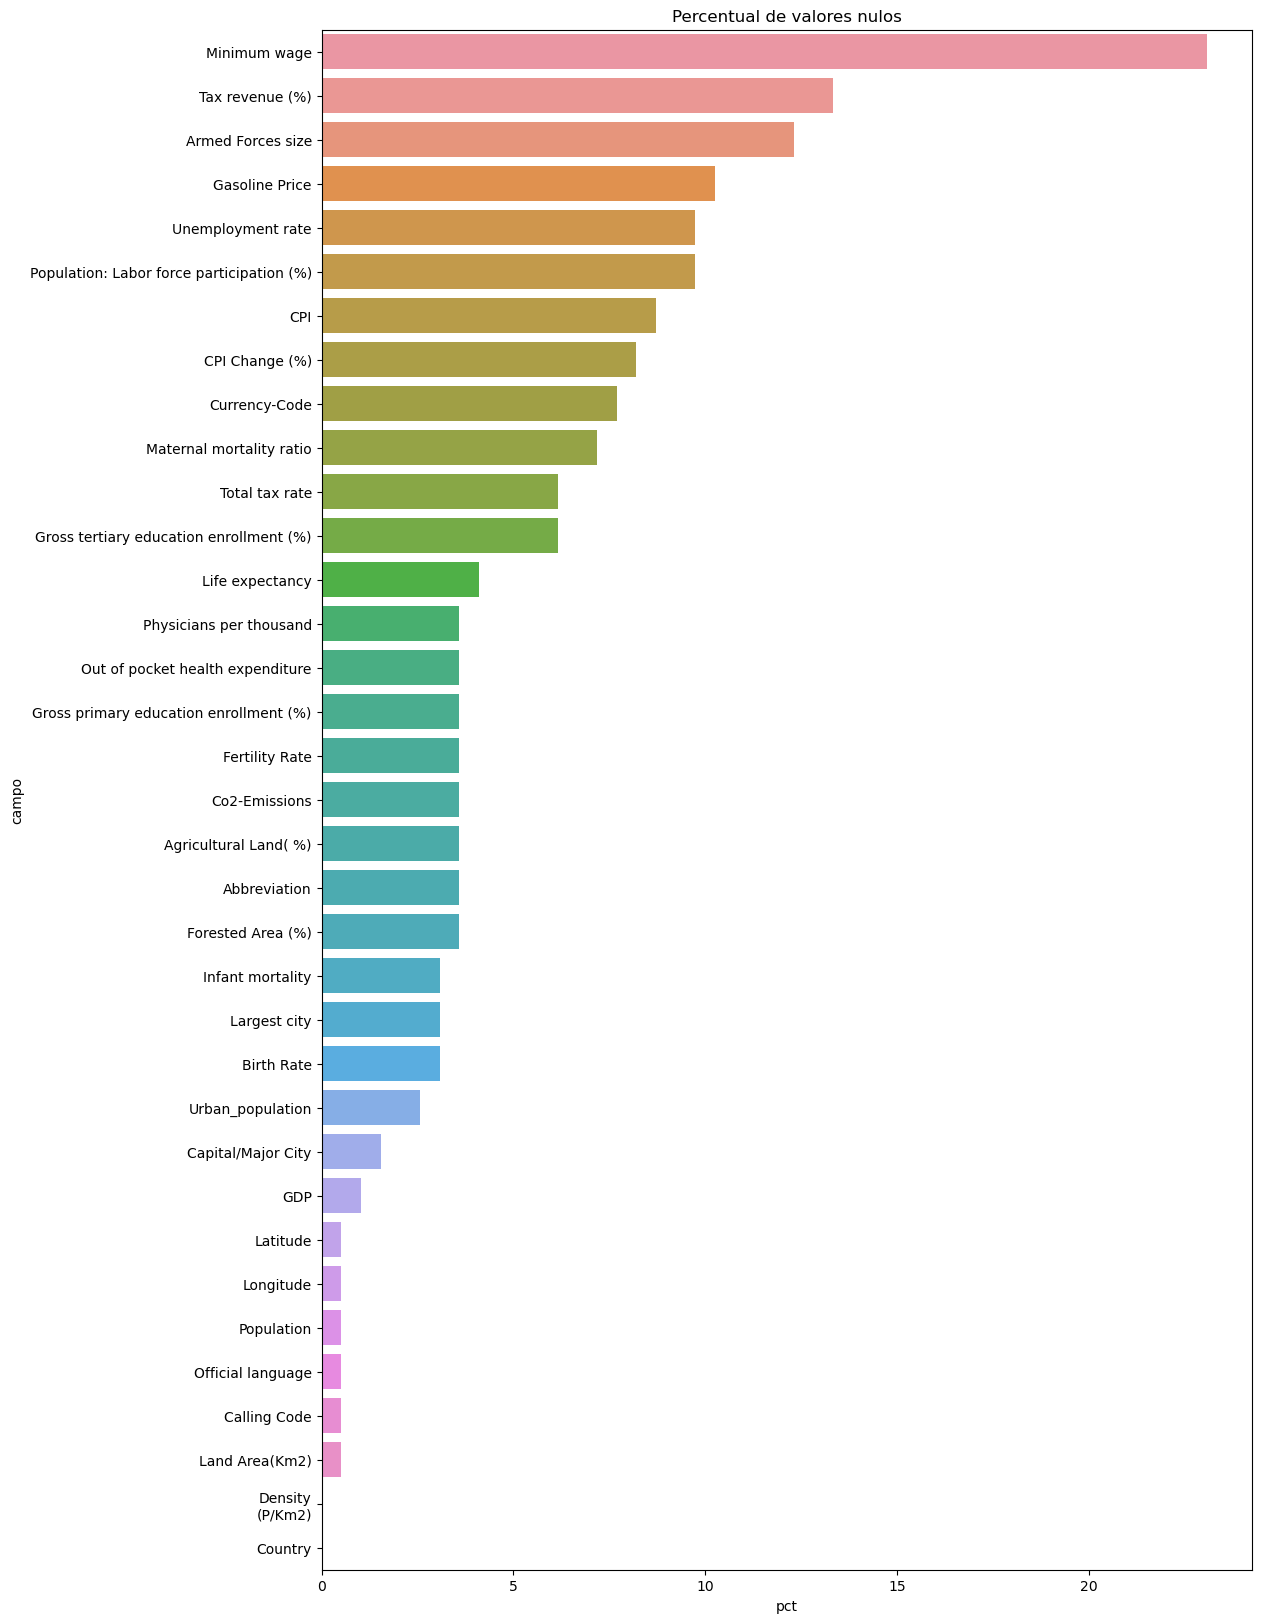

In [132]:
# Conhecer quais e quantos valores valtantes existem 
missing_values = pd.DataFrame({
    'campo': data.isna().sum().index,
    'nan': data.isna().sum().values
})

missing_values['pct'] = missing_values['nan'].apply(lambda x : x/data.shape[0]*100)

plt.figure(figsize=(12,20))
sns.barplot(data=missing_values.sort_values(by='pct', ascending=False), \
            y='campo', x='pct')

plt.title('Percentual de valores nulos')
plt.show()

In [133]:
# Exclusão de colunas redundantes
data.drop(['Abbreviation', 'Largest city', 'Currency-Code', 'Capital/Major City'], axis=1, inplace=True)

# Substituíndo valores NaN pela mediana
for campo in campos_numericos:
    data[campo].fillna(data[campo].median(), inplace=True)

# Substituíndo valor faltante pela moda
data['Official language'].fillna(data['Official language'].mode().values[0], inplace=True)

assert data.isnull().sum().sum() == 0, "Ainda existem valores nulos"
data.to_csv('./../../Datasets/word-data-2023-01.csv')

5. **Tratamento de Dados Categóricos:**
   - Converter variáveis categóricas em numéricas usando codificação one-hot (pandas `get_dummies`) ou Label Encoding (scikit-learn `LabelEncoder`).


In [134]:
le = preprocessing.LabelEncoder()
for column in data.columns:
    if(data[column].dtypes=='object'):
        data[column] = le.fit_transform(data[column])
        
data.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,0,60.0,58.1,652230.0,323000.0,32.49,93.0,8672.0,149.90,2.3,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,64.5,638.0,0.43,50,78.4,0.28,38041754.0,48.90,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,1,105.0,43.1,28748.0,9000.0,11.78,355.0,4536.0,119.05,1.4,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,78.5,15.0,1.12,1,56.9,1.20,2854191.0,55.70,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,2,18.0,17.4,2381741.0,317000.0,24.28,213.0,150006.0,151.36,2.0,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,76.7,112.0,0.95,3,28.1,1.72,43053054.0,41.20,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,3,164.0,40.0,468.0,31000.0,7.20,376.0,469.0,125.34,2.3,1.27,34.0,1.51,3.154058e+09,106.4,31.2,2.7,73.2,53.0,6.63,10,36.4,3.33,77142.0,62.45,16.3,37.2,5.36,67873.0,42.506285,1.521801
4,4,26.0,47.5,1246700.0,117000.0,40.73,244.0,34693.0,261.73,17.1,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,60.8,241.0,0.71,53,33.4,0.21,31825295.0,77.50,9.2,49.1,6.89,21061025.0,-11.202692,17.873887



6. **Redução de Dimensionalidade:**
   - Usar técnicas como PCA (Análise de Componentes Principais) para reduzir a dimensionalidade de dados.


In [135]:
# Escolher variáveis com alta correlação
correlation_matrix = data.corr()
correlation_matrix.style.background_gradient(cmap = 'coolwarm')


,Country,Density (P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,1.000000,0.034997,0.069317,-0.059148,0.008141,0.037904,0.031780,-0.013808,0.149944,0.150758,0.039928,0.002449,-0.025655,0.024617,-0.064204,-0.088948,-0.027879,-0.020724,-0.010677,-0.023018,0.160898,-0.106126,-0.063098,-0.056035,0.004053,-0.052804,-0.200369,0.015738,-0.054529,-0.015566,0.081633
Density (P/Km2),0.034997,1.000000,-0.033645,-0.053637,-0.023926,-0.147679,0.006136,-0.019218,-0.025382,-0.029640,-0.074340,-0.032696,0.224237,-0.018790,0.003602,0.019196,-0.107245,0.064183,-0.062929,0.249618,-0.054585,-0.092285,0.204563,-0.017870,0.019065,-0.014490,-0.039397,-0.055211,-0.023438,0.064664,0.031936
Agricultural Land( %),0.069317,-0.033645,1.000000,-0.031372,0.040478,0.195054,-0.066760,0.061898,-0.007213,-0.013782,0.176654,-0.434566,0.045731,0.051623,-0.046669,-0.109088,0.203945,-0.240095,0.201359,-0.002432,0.088901,0.131005,-0.035146,0.117165,-0.108046,-0.052135,0.159640,0.067871,0.101364,-0.034182,-0.016128
Land Area(Km2),-0.059148,-0.053637,-0.031372,1.000000,0.558671,-0.063630,-0.230260,0.591510,0.025093,0.038532,-0.059989,-0.014244,-0.183163,0.550855,0.006032,0.223394,-0.061995,0.052961,-0.041482,0.140740,0.132014,-0.012785,0.074271,0.446891,-0.006003,-0.166227,0.092846,0.053351,0.547687,0.048496,0.010060
Armed Forces size,0.008141,-0.023926,0.040478,0.558671,1.000000,-0.129806,-0.182490,0.742572,0.044282,0.064723,-0.136183,-0.038531,-0.161453,0.608858,0.049768,0.114691,-0.067275,0.071427,-0.086805,-0.011705,0.166837,0.152065,0.022056,0.877230,-0.077574,-0.189545,0.095963,-0.017489,0.852839,0.125502,0.169243
Birth Rate,0.037904,-0.147679,0.195054,-0.063630,-0.129806,1.000000,0.069782,-0.149560,0.140209,0.105081,0.977829,-0.073472,-0.197649,-0.179423,-0.080450,-0.710592,0.866677,-0.867507,0.761649,-0.431682,-0.077468,0.252097,-0.730514,-0.051323,0.167487,-0.353261,0.196852,-0.029077,-0.105700,-0.489723,0.032407
Calling Code,0.031780,0.006136,-0.066760,-0.230260,-0.182490,0.069782,1.000000,-0.156016,-0.072969,-0.085789,0.025224,-0.096186,-0.180507,-0.182437,-0.035105,-0.224971,-0.031832,-0.033359,-0.131787,-0.174715,-0.088247,0.012790,-0.041659,-0.165742,0.050682,-0.048030,-0.242073,-0.113109,-0.191600,0.012193,0.193684
Co2-Emissions,-0.013808,-0.019218,0.061898,0.591510,0.742572,-0.149560,-0.156016,1.000000,-0.014447,-0.001040,-0.136899,-0.027207,-0.068345,0.916978,0.001930,0.157411,-0.118478,0.117827,-0.100474,0.090509,0.128493,-0.028575,0.055886,0.810229,-0.013108,-0.143687,0.063710,0.012696,0.926331,0.114200,0.071017
CPI,0.149944,-0.025382,-0.007213,0.025093,0.044282,0.140209,-0.072969,-0.014447,1.000000,0.894924,0.137670,0.002757,-0.252502,-0.023630,-0.159170,0.003105,0.184591,-0.176028,0.299330,-0.083903,-0.003557,0.157630,-0.056019,-0.001572,0.019967,-0.056198,0.041498,0.126116,-0.005858,-0.076429,-0.029125
CPI Change (%),0.150758,-0.029640,-0.013782,0.038532,0.064723,0.105081,-0.085789,-0.001040,0.894924,1.000000,0.094966,0.013309,-0.258681,-0.007797,-0.124938,0.050153,0.154031,-0.144924,0.222862,-0.086926,0.043776,0.133698,-0.042776,0.009070,-0.016684,-0.077064,0.114516,0.118692,0.010888,-0.089377,-0.080274


In [136]:
# Após investigação, vemos que estas 3 variáveis possuem um comportamento similar e podem ser reduzidas
features = ['Infant mortality', 'Fertility Rate', 'Birth Rate']
data[features].corr()

,Infant mortality,Fertility Rate,Birth Rate
Infant mortality,1.000000,0.851826,0.866677
Fertility Rate,0.851826,1.000000,0.977829
Birth Rate,0.866677,0.977829,1.000000


In [137]:
# Separamos a features que devemos trabalhar juntas
X = data.loc[:,features].values
display("features", X)

# Normalizamos
X = preprocessing.StandardScaler().fit_transform(X)
display('fatures normalizadas', X)

pca = PCA(n_components=1)
principal_components = pca.fit_transform(X)

pd.DataFrame(data=principal_components, columns=['principal component 1'])

'features'

array([[47.9  ,  4.47 , 32.49 ],
       [ 7.8  ,  1.62 , 11.78 ],
       [20.1  ,  3.02 , 24.28 ],
       [ 2.7  ,  1.27 ,  7.2  ],
       [51.6  ,  5.52 , 40.73 ],
       [ 5.   ,  1.99 , 15.33 ],
       [ 8.8  ,  2.26 , 17.02 ],
       [11.   ,  1.76 , 13.99 ],
       [ 3.1  ,  1.74 , 12.6  ],
       [ 2.9  ,  1.47 ,  9.7  ],
       [19.2  ,  1.73 , 14.   ],
       [ 8.3  ,  1.75 , 13.97 ],
       [ 6.1  ,  1.99 , 13.99 ],
       [25.1  ,  2.04 , 18.18 ],
       [11.3  ,  1.62 , 10.65 ],
       [ 2.6  ,  1.45 ,  9.9  ],
       [ 2.9  ,  1.62 , 10.3  ],
       [11.2  ,  2.31 , 20.79 ],
       [60.5  ,  4.84 , 36.22 ],
       [24.8  ,  1.98 , 17.26 ],
       [21.8  ,  2.73 , 21.75 ],
       [ 5.   ,  1.27 ,  8.11 ],
       [30.   ,  2.87 , 24.82 ],
       [12.8  ,  1.73 , 13.92 ],
       [ 9.8  ,  1.85 , 14.9  ],
       [ 5.9  ,  1.56 ,  8.9  ],
       [49.   ,  5.19 , 37.93 ],
       [41.   ,  5.41 , 39.01 ],
       [59.4  ,  4.65 , 35.74 ],
       [16.7  ,  2.27 , 19.49 ],
       [24

'fatures normalizadas'

array([[ 1.39286838e+00,  1.42082324e+00,  1.26308594e+00],
       [-6.91795382e-01, -8.43749415e-01, -8.55918309e-01],
       [-5.23598648e-02,  2.68672241e-01,  4.23055765e-01],
       [-9.56927182e-01, -1.12185483e+00, -1.32453441e+00],
       [ 1.58521890e+00,  2.25513949e+00,  2.10618565e+00],
       [-8.37357939e-01, -5.49752263e-01, -4.92689672e-01],
       [-6.39808755e-01, -3.35213801e-01, -3.19772377e-01],
       [-5.25438175e-01, -7.32507249e-01, -6.29795693e-01],
       [-9.36132531e-01, -7.48398987e-01, -7.72017610e-01],
       [-9.46529857e-01, -9.62937450e-01, -1.06873959e+00],
       [-9.91478295e-02, -7.56344856e-01, -6.28772514e-01],
       [-6.65802069e-01, -7.40453118e-01, -6.31842051e-01],
       [-7.80172649e-01, -5.49752263e-01, -6.29795693e-01],
       [ 2.07573272e-01, -5.10022918e-01, -2.01083583e-01],
       [-5.09842186e-01, -8.43749415e-01, -9.71537565e-01],
       [-9.62125845e-01, -9.78829188e-01, -1.04827601e+00],
       [-9.46529857e-01, -8.43749415e-01

,principal component 1
0,2.352064
1,-1.383166
2,0.376223
3,-1.969396
4,3.442599
...,...
190,-0.318896
191,-0.631578
192,1.768163
193,2.430486



7. **Estatisticas:**
   - Usar a função describe nos dados


In [138]:
data_describe = data.describe()
data_describe

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,195.000000,195.000000,195.000000,1.950000e+02,1.950000e+02,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000
mean,97.000000,356.764103,39.134872,6.867007e+05,1.434872e+05,20.145282,360.007692,1.718583e+05,184.783744,6.359487,2.681872,32.014872,1.000154,4.727532e+11,102.473077,37.547179,21.107179,72.317436,152.682051,1.928949,32.558974,32.567692,1.826205,3.922447e+07,62.710000,16.537436,40.599487,6.737641,2.185258e+07,19.083026,20.236230
std,56.435804,1982.888967,21.386637,1.917085e+06,3.588039e+05,9.798615,322.490008,8.240967e+05,380.557800,23.452045,1.261755,23.358162,0.349395,2.161411e+12,12.912165,28.388404,19.285229,7.330019,226.629794,2.648408,21.688763,18.827087,1.655113,1.447345e+08,9.975707,6.479029,19.930828,4.845382,7.450449e+07,23.900297,66.543960
min,0.000000,2.000000,0.600000,0.000000e+00,0.000000e+00,5.900000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,0.000000,0.000000,4.727146e+07,23.400000,0.800000,1.400000,52.800000,2.000000,0.010000,0.000000,0.200000,0.010000,8.360000e+02,38.000000,0.000000,8.000000,0.090000,5.464000e+03,-40.900557,-175.198242
25%,48.500000,35.500000,22.650000,2.445650e+04,1.250000e+04,11.450000,83.000000,2.625500e+03,114.470000,1.050000,1.710000,11.450000,0.790000,8.476801e+09,99.350000,12.650000,6.100000,67.450000,16.500000,0.530000,17.000000,17.700000,0.360000,2.004434e+06,57.250000,12.550000,30.900000,3.590000,1.218046e+06,4.553072,-7.658537
50%,97.000000,89.000000,39.600000,1.195110e+05,3.100000e+04,17.950000,255.500000,1.230300e+04,125.340000,2.300000,2.245000,32.000000,0.980000,3.438723e+10,102.550000,31.200000,14.000000,73.200000,53.000000,1.045000,22.000000,30.700000,1.460000,8.826588e+06,62.450000,16.300000,37.200000,5.360000,4.678104e+06,17.273849,20.972652
75%,145.500000,216.500000,54.850000,5.205440e+05,1.230000e+05,28.445000,506.500000,6.194100e+04,155.605000,3.750000,3.565000,47.450000,1.185000,2.304710e+11,107.550000,61.100000,31.550000,77.250000,175.000000,1.625000,53.500000,43.750000,2.875000,2.856227e+07,68.300000,20.300000,47.300000,8.840000,1.460139e+07,40.106102,48.046657
max,194.000000,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,4583.710000,254.900000,6.910000,98.300000,2.000000,2.142770e+13,142.500000,136.600000,84.500000,85.400000,1150.000000,13.590000,76.000000,81.600000,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08,64.963051,178.065032


8. **Medidas Básicas:**
   - Criar um dataframe com as medidas básicas de cada coluna (média, mediana, variância e desvio padrão).


In [139]:
medidas_basicas = data_describe.T[['mean', '50%', 'std']]
medidas_basicas['var'] = medidas_basicas['std'].apply(lambda x : x**2)
medidas_basicas.columns = ['media', 'mediana', 'desvio_padrao', 'variancia']
medidas_basicas.head()

,media,mediana,desvio_padrao,variancia
Country,97.000000,97.0,5.643580e+01,3.185000e+03
Density\n(P/Km2),356.764103,89.0,1.982889e+03,3.931849e+06
Agricultural Land( %),39.134872,39.6,2.138664e+01,4.573883e+02
Land Area(Km2),686700.707692,119511.0,1.917085e+06,3.675215e+12
Armed Forces size,143487.179487,31000.0,3.588039e+05,1.287403e+11


In [140]:
# Alternativa ...
medidas_basicas = {
    'media' : data.mean().astype('float'),
    'mediana': data.median(),
    'variancia': data.var(), 
    'desvio_padrao': data.std() 
}

pd.DataFrame(medidas_basicas)

,media,mediana,variancia,desvio_padrao
Country,9.700000e+01,9.700000e+01,3.185000e+03,5.643580e+01
Density\n(P/Km2),3.567641e+02,8.900000e+01,3.931849e+06,1.982889e+03
Agricultural Land( %),3.913487e+01,3.960000e+01,4.573883e+02,2.138664e+01
Land Area(Km2),6.867007e+05,1.195110e+05,3.675215e+12,1.917085e+06
Armed Forces size,1.434872e+05,3.100000e+04,1.287403e+11,3.588039e+05
Birth Rate,2.014528e+01,1.795000e+01,9.601286e+01,9.798615e+00
Calling Code,3.600077e+02,2.555000e+02,1.039998e+05,3.224900e+02
Co2-Emissions,1.718583e+05,1.230300e+04,6.791354e+11,8.240967e+05
CPI,1.847837e+02,1.253400e+02,1.448242e+05,3.805578e+02
CPI Change (%),6.359487e+00,2.300000e+00,5.499984e+02,2.345204e+01


9.  **Detectar e remover outliers:**
    - Criar uma função que detecte e remova os outliers dos dados usando o método de intervalo interquartil (IQR).


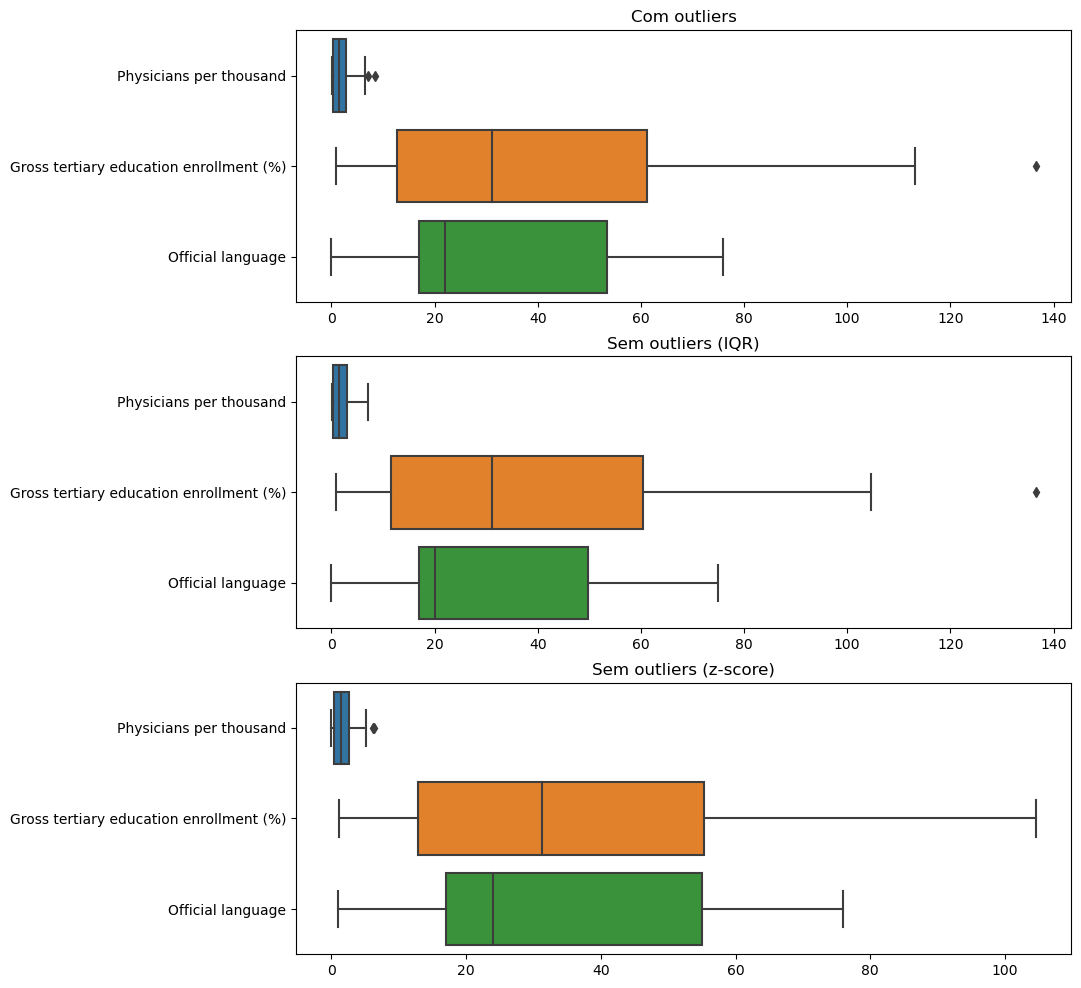

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
9,9,109.0,32.4,83871.0,21000.0,9.70,43.0,61448.0,118.06,1.5,1.47,46.9,1.20,4.463147e+11,103.1,85.1,2.9,81.6,5.0,1.045,22,17.9,5.17,8877067.0,60.7,25.4,51.4,4.67,5194416.0,47.516231,14.550072
192,192,56.0,44.6,527968.0,40000.0,30.45,967.0,10609.0,157.58,8.1,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,66.1,164.0,1.045,3,81.0,0.31,29161922.0,38.0,16.3,26.6,12.91,10869523.0,15.552727,48.516388
175,174,152.0,70.2,56785.0,10000.0,33.11,228.0,3000.0,113.30,0.7,4.32,3.1,0.71,5.459979e+09,123.8,14.5,47.4,60.8,396.0,0.340,20,51.0,0.08,8082366.0,77.6,16.9,48.2,2.04,3414638.0,8.619543,0.824782
183,182,75.0,71.7,603550.0,297000.0,8.70,380.0,202250.0,281.66,7.9,1.30,16.7,0.83,1.537811e+11,99.0,82.7,7.5,71.6,19.0,0.840,73,47.8,2.99,44385155.0,54.2,20.1,45.2,8.88,30835699.0,48.379433,31.165580
125,121,19.0,36.1,1267000.0,10000.0,46.08,227.0,2017.0,109.32,-2.5,6.91,0.9,0.88,1.292815e+10,74.7,4.4,48.0,62.0,509.0,0.290,20,52.3,0.04,23310715.0,72.0,11.8,47.2,0.47,3850231.0,17.607789,8.081666
150,168,228.0,50.7,964.0,1000.0,31.54,239.0,121.0,185.09,7.9,4.32,55.8,0.98,4.290166e+08,106.8,13.4,24.4,70.2,130.0,1.045,17,11.7,0.05,215056.0,57.8,14.6,37.0,13.37,158277.0,17.273849,20.972652
157,154,114.0,39.2,49035.0,16000.0,10.60,421.0,32424.0,115.34,2.7,1.52,40.4,1.32,1.054223e+11,98.7,46.6,4.6,77.2,5.0,3.110,59,18.4,3.42,5454073.0,59.5,18.7,49.7,5.56,2930419.0,48.669026,19.699024
179,178,110.0,49.8,783562.0,512000.0,16.03,90.0,372725.0,234.44,15.2,2.07,15.4,1.42,7.544117e+11,93.2,23.9,9.1,77.4,17.0,3.450,70,16.9,1.85,83429615.0,52.8,17.9,42.3,13.49,63097818.0,38.963745,35.243322
172,170,67.0,44.8,947300.0,28000.0,36.70,255.0,11973.0,187.43,3.5,4.89,51.6,0.87,6.317707e+10,94.2,4.0,37.6,65.0,524.0,0.090,63,26.1,0.01,58005463.0,83.4,11.5,43.8,1.98,20011885.0,-6.369028,34.888822
86,83,115.0,12.0,89342.0,116000.0,21.98,962.0,25108.0,125.60,0.8,2.76,1.1,1.10,4.374366e+10,81.5,34.4,13.9,74.4,46.0,1.490,3,25.1,2.32,10101694.0,39.3,15.1,28.6,14.72,9213048.0,30.585164,36.238414


In [141]:
def get_limites_IQR(campo_, rate_= 2):
    tmp = data[campo_]
    IQR = pd.Series(tmp.values).quantile(0.75) - pd.Series(tmp.values).quantile(0.25)
    lower_limit = tmp.mean() - (rate_ * IQR)
    upper_limit = tmp.mean() + (rate_ * IQR)
    return lower_limit, upper_limit

data_sem_outliers = pd.DataFrame()
for campo in data.columns:
    limite_inferior, limite_superior = get_limites_IQR(campo, 1.5)
    data_sem_outliers = data[(data[campo] >= limite_inferior) & (data[campo] <= limite_superior)]
    
data_sem_outliers_z_score = data[(np.abs(stats.zscore(data))<3).all(axis=1)]

campos = np.random.choice(data.columns, 3)

plt.subplots(3,1, figsize=(10,12))
plt.subplot(3,1,1)
sns.boxplot(data=data[campos], orient='h')
plt.title("Com outliers")

plt.subplot(3,1,2)
sns.boxplot(data=data_sem_outliers[campos], orient='h')
plt.title("Sem outliers (IQR)")

plt.subplot(3,1,3)
sns.boxplot(data=data_sem_outliers_z_score[campos], orient='h')
plt.title("Sem outliers (z-score)")
plt.show()

display(data_sem_outliers.sample(10))


10. **Correlação:**
    - Verificar a correlação entre as variáveis.


In [142]:
correlation_matrix.style.background_gradient()

,Country,Density (P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,1.000000,0.034997,0.069317,-0.059148,0.008141,0.037904,0.031780,-0.013808,0.149944,0.150758,0.039928,0.002449,-0.025655,0.024617,-0.064204,-0.088948,-0.027879,-0.020724,-0.010677,-0.023018,0.160898,-0.106126,-0.063098,-0.056035,0.004053,-0.052804,-0.200369,0.015738,-0.054529,-0.015566,0.081633
Density (P/Km2),0.034997,1.000000,-0.033645,-0.053637,-0.023926,-0.147679,0.006136,-0.019218,-0.025382,-0.029640,-0.074340,-0.032696,0.224237,-0.018790,0.003602,0.019196,-0.107245,0.064183,-0.062929,0.249618,-0.054585,-0.092285,0.204563,-0.017870,0.019065,-0.014490,-0.039397,-0.055211,-0.023438,0.064664,0.031936
Agricultural Land( %),0.069317,-0.033645,1.000000,-0.031372,0.040478,0.195054,-0.066760,0.061898,-0.007213,-0.013782,0.176654,-0.434566,0.045731,0.051623,-0.046669,-0.109088,0.203945,-0.240095,0.201359,-0.002432,0.088901,0.131005,-0.035146,0.117165,-0.108046,-0.052135,0.159640,0.067871,0.101364,-0.034182,-0.016128
Land Area(Km2),-0.059148,-0.053637,-0.031372,1.000000,0.558671,-0.063630,-0.230260,0.591510,0.025093,0.038532,-0.059989,-0.014244,-0.183163,0.550855,0.006032,0.223394,-0.061995,0.052961,-0.041482,0.140740,0.132014,-0.012785,0.074271,0.446891,-0.006003,-0.166227,0.092846,0.053351,0.547687,0.048496,0.010060
Armed Forces size,0.008141,-0.023926,0.040478,0.558671,1.000000,-0.129806,-0.182490,0.742572,0.044282,0.064723,-0.136183,-0.038531,-0.161453,0.608858,0.049768,0.114691,-0.067275,0.071427,-0.086805,-0.011705,0.166837,0.152065,0.022056,0.877230,-0.077574,-0.189545,0.095963,-0.017489,0.852839,0.125502,0.169243
Birth Rate,0.037904,-0.147679,0.195054,-0.063630,-0.129806,1.000000,0.069782,-0.149560,0.140209,0.105081,0.977829,-0.073472,-0.197649,-0.179423,-0.080450,-0.710592,0.866677,-0.867507,0.761649,-0.431682,-0.077468,0.252097,-0.730514,-0.051323,0.167487,-0.353261,0.196852,-0.029077,-0.105700,-0.489723,0.032407
Calling Code,0.031780,0.006136,-0.066760,-0.230260,-0.182490,0.069782,1.000000,-0.156016,-0.072969,-0.085789,0.025224,-0.096186,-0.180507,-0.182437,-0.035105,-0.224971,-0.031832,-0.033359,-0.131787,-0.174715,-0.088247,0.012790,-0.041659,-0.165742,0.050682,-0.048030,-0.242073,-0.113109,-0.191600,0.012193,0.193684
Co2-Emissions,-0.013808,-0.019218,0.061898,0.591510,0.742572,-0.149560,-0.156016,1.000000,-0.014447,-0.001040,-0.136899,-0.027207,-0.068345,0.916978,0.001930,0.157411,-0.118478,0.117827,-0.100474,0.090509,0.128493,-0.028575,0.055886,0.810229,-0.013108,-0.143687,0.063710,0.012696,0.926331,0.114200,0.071017
CPI,0.149944,-0.025382,-0.007213,0.025093,0.044282,0.140209,-0.072969,-0.014447,1.000000,0.894924,0.137670,0.002757,-0.252502,-0.023630,-0.159170,0.003105,0.184591,-0.176028,0.299330,-0.083903,-0.003557,0.157630,-0.056019,-0.001572,0.019967,-0.056198,0.041498,0.126116,-0.005858,-0.076429,-0.029125
CPI Change (%),0.150758,-0.029640,-0.013782,0.038532,0.064723,0.105081,-0.085789,-0.001040,0.894924,1.000000,0.094966,0.013309,-0.258681,-0.007797,-0.124938,0.050153,0.154031,-0.144924,0.222862,-0.086926,0.043776,0.133698,-0.042776,0.009070,-0.016684,-0.077064,0.114516,0.118692,0.010888,-0.089377,-0.080274


In [143]:
# Selecionando pares de variáveis com correlação positiva > .80
corr_matrix_unstacked = correlation_matrix.unstack()
corr_matrix_unstacked.sort_values(ascending=False, inplace=True)
upper_80 = [(col1, col2) for col1, col2 in corr_matrix_unstacked.index if corr_matrix_unstacked[col1, col2] > 0.8 and col1 != col2]
set(upper_80)

{('Armed Forces size', 'Population'),
 ('Armed Forces size', 'Urban_population'),
 ('Birth Rate', 'Fertility Rate'),
 ('Birth Rate', 'Infant mortality'),
 ('CPI', 'CPI Change (%)'),
 ('CPI Change (%)', 'CPI'),
 ('Co2-Emissions', 'GDP'),
 ('Co2-Emissions', 'Population'),
 ('Co2-Emissions', 'Urban_population'),
 ('Fertility Rate', 'Birth Rate'),
 ('Fertility Rate', 'Infant mortality'),
 ('GDP', 'Co2-Emissions'),
 ('Infant mortality', 'Birth Rate'),
 ('Infant mortality', 'Fertility Rate'),
 ('Infant mortality', 'Maternal mortality ratio'),
 ('Maternal mortality ratio', 'Infant mortality'),
 ('Population', 'Armed Forces size'),
 ('Population', 'Co2-Emissions'),
 ('Population', 'Urban_population'),
 ('Urban_population', 'Armed Forces size'),
 ('Urban_population', 'Co2-Emissions'),
 ('Urban_population', 'Population')}


11. **Normalização:**
    - Normalizar dados numéricos para terem média zero e desvio padrão 1 usando `StandardScaler` do scikit-learn.

In [144]:
scaler = preprocessing.StandardScaler()
data_normalizada = pd.DataFrame.from_records(scaler.fit_transform(data_sem_outliers_z_score))
data_normalizada.describe().T[['mean', 'std']].astype(int)

,mean,std
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


**Perguntas**

Q1: Quais são os 10 países com a Maior Área Terrestre (Km²)?

Q2: Considerando todos os países, qual deles possui mais espaço dedicado à agricultura?

Q3: Considerando todos os países, qual deles possui a maior porcentagem de Área Florestal?

print('Q4: Qual país possui a maior população?')
print('Q5: Considerando todos os países, qual é a porcentagem da população que vive em Áreas Urbanas?') E a porcentagem da população por país vivendo em Áreas Urbanas?')
print('Q6: Quais são os 10 países com a maior porcentagem de população vivendo em Áreas Rurais?')
print('Q7: Quais são os 10 países com o preço mais alto da gasolina?')
print('Q8: Quais são os 10 países com o maior e o menor GDP?')
print('Q9: Qual é o idioma mais falado?')
print('Q10: Quais são os países com as maiores emissões de CO2?')
print('Q11: Quais são os países com a maior média de expectativa de vida?')
print('Q12: Dentre os Top 10 com maior média de expectativa de vida, qual o país com a maior porcentagem de população vivendo em Áreas Rurais?')

In [145]:
data['Country'] = nomes_paises
data['Official language'] = linguas

def most_values(field_, count_, asc=False):
    return data[['Country', field_]].sort_values(by=field_, ascending=asc).head(count_)

print('Q1: Quais são os 10 países com a Maior Área Terrestre (Km²)?')
display(most_values('Land Area(Km2)', 10))

print('Q2: Considerando todos os países, qual deles possui mais espaço dedicado à agricultura?')
display(most_values('Agricultural Land( %)', 1))

print('Q3: Considerando todos os países, qual deles possui a maior porcentagem de Área Florestal?')
display(most_values('Forested Area (%)', 1))

print('Q4: Qual país possui a maior população?')
display(most_values('Population', 1))


Q1: Quais são os 10 países com a Maior Área Terrestre (Km²)?


,Country,Land Area(Km2)
143,Russia,17098240.0
32,Canada,9984670.0
186,United States,9833517.0
36,China,9596960.0
23,Brazil,8515770.0
8,Australia,7741220.0
77,India,3287263.0
6,Argentina,2780400.0
87,Kazakhstan,2724900.0
2,Algeria,2381741.0


Q2: Considerando todos os países, qual deles possui mais espaço dedicado à agricultura?


,Country,Agricultural Land( %)
187,Uruguay,82.6


Q3: Considerando todos os países, qual deles possui a maior porcentagem de Área Florestal?


,Country,Forested Area (%)
167,Suriname,98.3


Q4: Qual país possui a maior população?


,Country,Population
36,China,1.397715e+09


In [146]:

print('Q5: Considerando todos os países, qual é a porcentagem da população que vive em Áreas Urbanas?') 
display(f"{((data['Urban_population'].sum()/data['Population'].sum())*100).round(3)}% da população vive em áreas urbanas")

print('E a porcentagem da população por país vivendo em Áreas Urbanas?')
pop = data.loc[:,['Country', 'Population', 'Urban_population']]
pop['pct_urban_pop'] = (data['Urban_population']/data['Population'])*100
pop['pct_rural_pop'] = 100 - pop['pct_urban_pop']
pop


Q5: Considerando todos os países, qual é a porcentagem da população que vive em Áreas Urbanas?


'55.712% da população vive em áreas urbanas'

E a porcentagem da população por país vivendo em Áreas Urbanas?


,Country,Population,Urban_population,pct_urban_pop,pct_rural_pop
0,Afghanistan,38041754.0,9797273.0,25.753999,74.246001
1,Albania,2854191.0,1747593.0,61.229014,38.770986
2,Algeria,43053054.0,31510100.0,73.189001,26.810999
3,Andorra,77142.0,67873.0,87.984496,12.015504
4,Angola,31825295.0,21061025.0,66.176999,33.823001
...,...,...,...,...,...
190,Venezuela,28515829.0,25162368.0,88.240002,11.759998
191,Vietnam,96462106.0,35332140.0,36.628000,63.372000
192,Yemen,29161922.0,10869523.0,37.272999,62.727001
193,Zambia,17861030.0,7871713.0,44.071999,55.928001


In [147]:
print('Q6: Quais são os 10 países com a maior porcentagem de população vivendo em Áreas Rurais?')
display(pop.loc[:, ['Country', 'pct_rural_pop']].sort_values(by='pct_rural_pop', ascending=False).head(10))


Q6: Quais são os 10 países com a maior porcentagem de população vivendo em Áreas Rurais?


,Country,pct_rural_pop
174,East Timor,88.566229
135,Papua New Guinea,86.750005
27,Burundi,86.634003
98,Liechtenstein,85.628239
125,Niger,83.482999
102,Malawi,82.826000
144,Rwanda,82.686999
148,Samoa,82.426200
54,Eritrea,81.846747
165,Sri Lanka,81.414998


In [148]:

print('Q7: Quais são os 10 países com o preço mais alto da gasolina?')
display(most_values('Gasoline Price', 10))

Q7: Quais são os 10 países com o preço mais alto da gasolina?


,Country,Gasoline Price
54,Eritrea,2.00
113,Monaco,2.00
14,Barbados,1.81
129,Norway,1.78
98,Liechtenstein,1.74
76,Iceland,1.69
122,Netherlands,1.68
104,Maldives,1.63
83,Italy,1.61
82,Israel,1.57


In [149]:
print('Q8: Quais são os 10 países com o maior e o menor GDP?')
display(most_values('GDP', 10))
display(most_values('GDP', 10, True))

Q8: Quais são os 10 países com o maior e o menor GDP?


,Country,GDP
186,United States,2.142770e+13
36,China,1.991000e+13
85,Japan,5.081770e+12
64,Germany,3.845630e+12
185,United Kingdom,2.827113e+12
60,France,2.715518e+12
77,India,2.611000e+12
162,South Korea,2.029000e+12
83,Italy,2.001244e+12
23,Brazil,1.839758e+12


,Country,GDP
181,Tuvalu,47271463.0
120,Nauru,133000000.0
89,Kiribati,194647202.0
107,Marshall Islands,221278000.0
132,Palau,283994900.0
111,Federated States of Micronesia,401932279.0
150,S�����������,429016605.0
176,Tonga,450353314.0
48,Dominica,596033333.0
147,Saint Vincent and the Grenadines,825385185.0


In [155]:
print('Q9: Qual é o idioma mais falado?')
display(data['Official language'].mode().values[0])


Q9: Qual é o idioma mais falado?


'English'

In [156]:
print('Q10: Quais são os países com as maiores emissões de CO2?')
display(most_values('Co2-Emissions', 10))

Q10: Quais são os países com as maiores emissões de CO2?


,Country,Co2-Emissions
36,China,9893038.0
186,United States,5006302.0
77,India,2407672.0
143,Russia,1732027.0
85,Japan,1135886.0
64,Germany,727973.0
79,Iran,661710.0
162,South Korea,620302.0
151,Saudi Arabia,563449.0
78,Indonesia,563325.0


In [159]:
print('Q11: Quais são os países com a maior média de expectativa de vida?')
life_exp = most_values('Life expectancy', 10)
display(life_exp)

Q11: Quais são os países com a maior média de expectativa de vida?


,Country,Life expectancy
149,San Marino,85.4
85,Japan,84.2
169,Switzerland,83.6
164,Spain,83.3
156,Singapore,83.1
98,Liechtenstein,83.0
83,Italy,82.9
82,Israel,82.8
129,Norway,82.8
76,Iceland,82.7


In [164]:
print('Q12: Dentre os Top 10 com maior média de expectativa de vida, qual o país com a maior porcentagem de população vivendo em Áreas Rurais?')
pop.iloc[life_exp.index].loc[:,['Country', 'pct_rural_pop']].max()


Q12: Dentre os Top 10 com maior média de expectativa de vida, qual o país com a maior porcentagem de população vivendo em Áreas Rurais?


Country          Switzerland
pct_rural_pop      85.628239
dtype: object